<a href="https://colab.research.google.com/github/zeinab818/Template-1-HTML-css/blob/main/sea-animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"safaali81","key":"92fbd06bc851ae9c70bf1d6ea05c4de3"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

kaggle.json


In [6]:
!kaggle datasets download -d mikoajfish99/marine-animal-images

 97% 221M/227M [00:03<00:00, 105MB/s] 
100% 227M/227M [00:03<00:00, 73.1MB/s]


In [7]:
!unzip -qq /content/marine-animal-images.zip

In [8]:
!ls

drive  images  kaggle.json  marine-animal-images.zip  sample_data


In [9]:
from ast import increment_lineno
import numpy as random
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2 as cv
import tensorflow as tf
import shutil
import argparse
import time
# from pathlib import path

import torch
import torch.backends.cudnn as cudnn
# from models.experimental import attempt_load
# from utils.datasets import LoadStreams, LoadImage
# from utils.general import check_img_size, check_requirements, check_imshow , non_max_suppression , apply_classifier,\ scale_coords, xyxy2xywh ,strip_optimizer,set_logging ,increment_path

# from utils.plots import plot_one_box
# from utils.torch_utils import select_device , load_classifier ,time synchronized, TracedModel

from natsort import natsorted


from tqdm.notebook import tqdm
from re import search

tqdm.pandas()
import plotly.express as px
from PIL import Image
import os, sys

import warnings
warnings.filterwarnings("ignore")

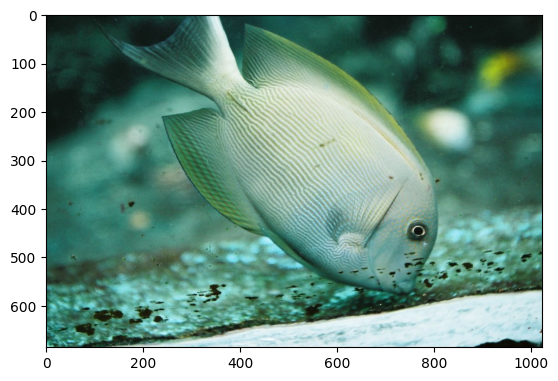

In [10]:
image1=Image.open("/content/images/train/Fish/002a10fdaac4ac6c.jpg")
plt.imshow(image1)
plt.show()

In [13]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 6.2 MB/s eta 0:00:00


In [28]:
!yolo predict model=yolov8n.pt source='/content/images/train/Fish'

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/89 /content/images/train/Fish/000c490ba1bf9479.jpg: 480x640 1 bird, 1 bear, 273.3ms
image 2/89 /content/images/train/Fish/002a10fdaac4ac6c.jpg: 448x640 1 bird, 199.1ms
image 3/89 /content/images/train/Fish/009b274dbe48b560.jpg: 480x640 1 bird, 195.5ms
image 4/89 /content/images/train/Fish/009be9518b748d44.jpg: 416x640 1 umbrella, 166.0ms
image 5/89 /content/images/train/Fish/00a4fca274a0051c.jpg: 480x640 1 carrot, 196.3ms
image 6/89 /content/images/train/Fish/00bdcae3c359d120.jpg: 640x512 (no detections), 228.2ms
image 7/89 /content/images/train/Fish/0134034e0ebae49a.jpg: 448x640 (no detections), 175.7ms
image 8/89 /content/images/train/Fish/01362dda3c59cfdf.jpg: 384x640 1 bird, 173.4ms
image 9/89 /content/images/train/Fish/020ad6731e0b1e5c.jpg: 512x640 7 persons, 1 frisbee, 2 surfboards, 199.3ms
image 10/89 /cont

In [27]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("/content/images/train/Fish")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [29]:
import sys
import os
os.environ["PYTHONPATH"] = "/content/yolov8m.pt" # set the path to YOLOv8

In [34]:
!python detect.py --img 640 --source test/images --weights runs/train/exp/weights/best.pt --conf 0.25

python3: can't open file '/content/detect.py': [Errno 2] No such file or directory


In [30]:
model.val(data="marine.yaml" # specify your custom dataset
          # device="cuda" # use GPU if available
          )

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
val: Scanning /content/labels/test/Fish... 0 images, 185 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<00:00, 847.14it/s]
val: WARNING ⚠️ No labels found in /content/labels/test/Fish.cache. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
val: WARNING ⚠️ Cache directory /content/labels/test is not writeable, cache not saved.
WARNING ⚠️ No labels found in /content/labels/test/Fish.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:52<00:00,  4.38s/it]
                   all        185          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 2.7ms preprocess, 247.4ms inference, 0.0ms loss, 2.6

AttributeError: ignored

In [31]:
model.predict(source="/content/images/train/Fish/02e3cbe3e99ac2e0.jpg", # provide an image as input
              save=True, # save the output to a file
              display=True # display the output on Colab
              )

SyntaxError: ignored